# What Linear Regression training algorithm can you use if you have a training set with millions of features?

Ans: Stochastic Gradient Descent (SGD)

# Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?

Ans: Gradient Descent can suffer from it because it will take take much time to converge at the optimal minimum for the learning rate is not selected properly. We should use the StandardScaler() from sklearn to scale our features input.

# Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

Ans: No, Gradient Descent cannot get stuck in a local minimum. This means there is only one global minimum, and Gradient Descent will converge to it if the learning rate is appropriately chosen. However, if the learning rate is too high, the algorithm might diverge or oscillate, and if it is too low, convergence can be very slow. 

# Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

Ans: Yes, all GD algorithms should lead to same model if given enough time with approximatly choosen learning rate.

# Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

Ans: It is probabaly overfitting, learning rate issues or poop data prepocessing. And we can fix it is by regularizing the model, add early stoping, collect more data

Early stopping at iteration 491
Theta with regularization and early stopping: [[3.70971095]
 [2.84872695]]


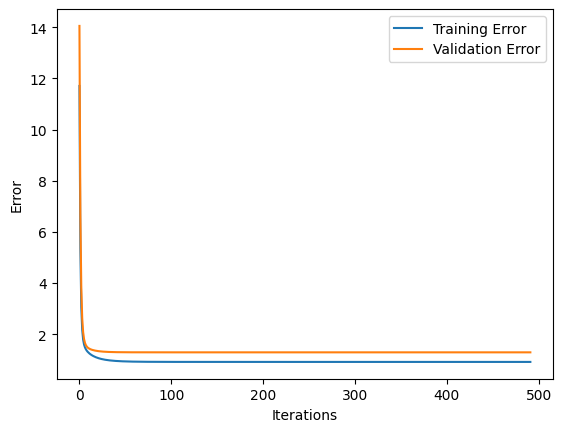

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split data into training and validation sets
train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Add bias term
X_b_train = np.c_[np.ones((train_size, 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

# Parameters
learning_rate = 0.1
n_iterations = 1000
m = len(X_b_train)
theta = np.random.randn(2, 1)
lambda_reg = 0.1  # Regularization parameter

# Lists to store error values
train_errors, val_errors = [], []

# Batch Gradient Descent with L2 Regularization and Early Stopping
for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train) + 2 * lambda_reg * theta
    theta -= learning_rate * gradients
    
    # Compute training and validation errors
    train_error = np.mean((X_b_train.dot(theta) - y_train) ** 2)
    val_error = np.mean((X_b_val.dot(theta) - y_val) ** 2)
    train_errors.append(train_error)
    val_errors.append(val_error)
    
    # Early stopping
    if iteration > 0 and val_errors[-1] > val_errors[-2]:
        print(f"Early stopping at iteration {iteration}")
        break

print("Theta with regularization and early stopping:", theta)

# Plot training and validation errors
plt.plot(train_errors, label="Training Error")
plt.plot(val_errors, label="Validation Error")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.legend()
plt.show()

## Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up

Ans: No


Early stopping at iteration 12
Theta with early stopping: [[4.22549669]
 [2.89657563]]


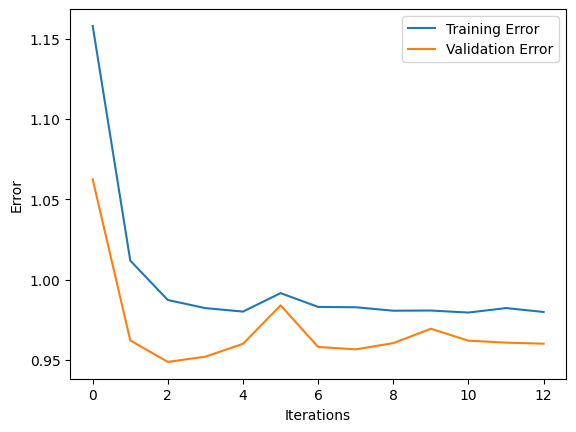

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

# Split data into training and validation sets
train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Add bias term
X_b_train = np.c_[np.ones((train_size, 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

# Parameters
learning_rate = 0.1
n_iterations = 1000
batch_size = 32
m = len(X_b_train)
theta = np.random.randn(2, 1)
patience = 10  # Number of epochs to wait after validation error starts increasing

# Lists to store error values
train_errors, val_errors = [], []

# Mini-batch Gradient Descent with Early Stopping
best_val_error = float('inf')
epochs_no_improve = 0

for iteration in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b_train[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i + batch_size]
        yi = y_shuffled[i:i + batch_size]
        gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
        theta -= learning_rate * gradients
    
    # Compute training and validation errors
    train_error = np.mean((X_b_train.dot(theta) - y_train) ** 2)
    val_error = np.mean((X_b_val.dot(theta) - y_val) ** 2)
    train_errors.append(train_error)
    val_errors.append(val_error)
    
    if val_error < best_val_error:
        best_val_error = val_error
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
    
    if epochs_no_improve >= patience:
        print(f"Early stopping at iteration {iteration}")
        break

print("Theta with early stopping:", theta)

# Plot training and validation errors
plt.plot(train_errors, label="Training Error")
plt.plot(val_errors, label="Validation Error")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.legend()
plt.show()


# Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

Ans: Stochastic Gradient Descent (SGD) typically reaches the vicinity of the optimal solution the fastest because it updates the model parameters after processing each individual training example but this comes with increased noise in the updates. We can also make use of an appropriate learning rate use early stopping. 

# Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

Ans: It is likely overfitting. We should train it with more data. Regularized the model(like reducing the number of degrees). As stop training once it reaches the optimal solution known as early stopping, and reduce the degree of the polynomial

# Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

Ans: It has high bias and we should reduce the hypermater

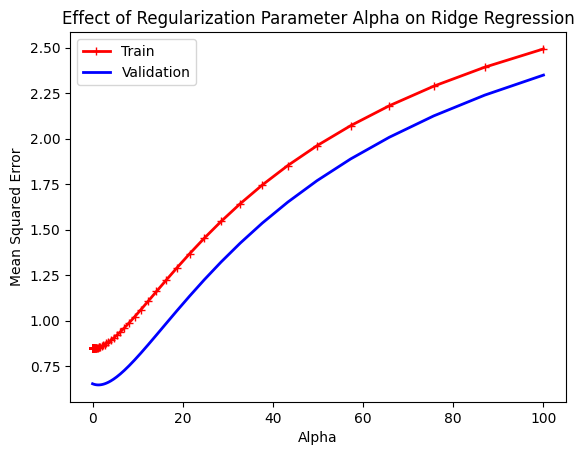

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot errors for different values of alpha
def plot_ridge_errors(alphas, X_train, y_train, X_val, y_val):
    train_errors, val_errors = [], []
    for alpha in alphas:
        ridge_reg = Ridge(alpha=alpha)
        ridge_reg.fit(X_train, y_train)
        y_train_predict = ridge_reg.predict(X_train)
        y_val_predict = ridge_reg.predict(X_val)
        train_errors.append(mean_squared_error(y_train, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(alphas, train_errors, "r-+", linewidth=2, label="Train")
    plt.plot(alphas, val_errors, "b-", linewidth=2, label="Validation")
    plt.xlabel("Alpha")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.title("Effect of Regularization Parameter Alpha on Ridge Regression")
    plt.show()

# Range of alpha values
alphas = np.logspace(-4, 2, 100)

# Plot the training and validation errors for different alphas
plot_ridge_errors(alphas, X_train, y_train, X_val, y_val)


# Why would you want to use:
• Ridge Regression instead of plain Linear Regression (i.e., without any regulari‐
zation)?

• Lasso instead of Ridge Regression?

• Elastic Net instead of Lasso?

Ans: It forces the model to keep the weightd as small as possible. Ridge Regression is preferred over plain Linear Regression because it includes a regularization term that penalizes large coefficients.

Ans: It tends to remove the weights of the less important features(it performs feature selection)

Ans: Because Lasso behaves rationaly when the number of features is greater the number of instances or when several features are strongly correlated. When the number of features is greater than the number of instances, or when several features are strongly correlated, Elastic Net can provide better performance by balancing the benefits of Lasso and Ridge.

In [4]:
# Finding the best alpha for both Lasso and Ridge
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming X_train, y_train are the training data
# Standardize the data
scaler = StandardScaler()

# Ridge Regression with Cross-Validation
ridge_cv = make_pipeline(scaler, RidgeCV(alphas=np.linspace(0.1, 10, 1000), cv=5))
ridge_cv.fit(X_train, y_train.ravel())
print("Best alpha for Ridge Regression:", ridge_cv.named_steps['ridgecv'].alpha_)

# Lasso Regression with Cross-Validation
lasso_cv = make_pipeline(scaler, LassoCV(alphas=np.linspace(0.1, 10, 1000), cv=5))
lasso_cv.fit(X_train, y_train.ravel())
print("Best alpha for Lasso Regression:", lasso_cv.named_steps['lassocv'].alpha_)


Best alpha for Ridge Regression: 1.6954954954954957
Best alpha for Lasso Regression: 0.1


# Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

Ans: You should implement a two Logistic Regression classifiers

# Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn)
Ans:

In [17]:
# print(iris.DESCR)

In [62]:
#Lets train with scikit-learn first
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss, confusion_matrix

y = iris.target
X = iris.data
# y = y.reshape(-1, 1)

# X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state= 42)

encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

pipeline = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss='log_loss', alpha=0.1, penalty='l2', max_iter=1000, tol=0.1,
                 early_stopping=True, n_iter_no_change=5, random_state=42)
)

pipeline.fit(X_train, y_train)

y_train_prob = pipeline.predict_proba(X_train)
y_test_prob = pipeline.predict_proba(X_test)

train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)

print('Training log loss function:', train_log_loss)
print('Testing log loss function:', test_log_loss)
pipeline.named_steps['sgdclassifier'].n_iter_

Training log loss function: 0.48212602011609274
Testing log loss function: 0.4595242483302891


C:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


6

In [61]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)

# Split data into training and validation sets
train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y_onehot[:train_size], y_onehot[train_size:]

# Add bias term to the features
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val_bias = np.c_[np.ones((X_val.shape[0], 1)), X_val]

# Initialize parameters
np.random.seed(42)
learning_rate = 0.1
n_iterations = 1000
m = len(X_train_bias)
n_features = X_train_bias.shape[1]
n_classes = y_train.shape[1]
theta = np.random.randn(n_features, n_classes)
lambda_reg = 0.1

def softmax(logits):
    exps = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

train_errors, val_errors = [], []

# Batch Gradient Descent with L2 Regularization and Early Stopping
for iteration in range(n_iterations):
    logits = X_train_bias.dot(theta)
    y_proba = softmax(logits)
    
    error = y_proba - y_train
    gradients = (1/m) * X_train_bias.T.dot(error) + lambda_reg * theta
    theta -= learning_rate * gradients
    
    # Compute training and validation errors
    train_logits = X_train_bias.dot(theta)
    train_proba = softmax(train_logits)
    train_error = -np.mean(np.sum(y_train * np.log(train_proba), axis=1))
    
    val_logits = X_val_bias.dot(theta)
    val_proba = softmax(val_logits)
    val_error = -np.mean(np.sum(y_val * np.log(val_proba), axis=1))
    
    train_errors.append(train_error)
    val_errors.append(val_error)
    
    # Early stopping
    if iteration > 0 and val_errors[-1] > val_errors[-2]:
        print(f"Early stopping at iteration {iteration}")
        break

print("Theta with regularization and early stopping: \n",theta)
val_error

Early stopping at iteration 7
Theta with regularization and early stopping: 
 [[ 0.28010197 -0.04552491  0.6938318 ]
 [ 0.18949195  0.3472763   0.43648705]
 [ 1.02188548  0.86006303 -0.14979693]
 [-0.69534888  0.17296771  0.16565969]
 [-0.20071134 -1.56346379 -1.36968344]]


C:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1.6837081774657792

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

ValueError: shapes (100000,3) and (5,3) not aligned: 3 (dim 1) != 5 (dim 0)